In [102]:
!pip install catboost

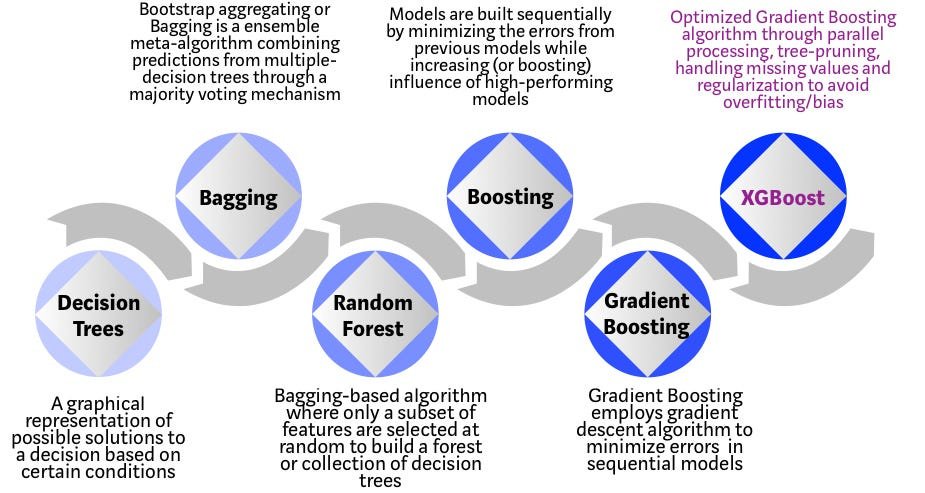

# Introducción al Algoritmo XGBoost


### XGBoost significa "Extreme Gradient Boosting".

**Es una biblioteca de aprendizaje automático de alto rendimiento basada en el artículo "Greedy Function Approximation: A Gradient Boosting Machine" de Friedman.**

**Es una biblioteca de aprendizaje automático de código abierto que proporciona una implementación de alto rendimiento de árboles de decisión potenciados por gradiente.**

Originalmente está escrita en C++ y es comparativamente más rápida que otros clasificadores de ensamblado.

### Pertenece a la familia de algoritmos de boosting y utiliza el marco de boosting por gradiente (GBM) en su núcleo.

XGBoost implementa un algoritmo de Boosting por Gradiente basado en árboles de decisión.

Por lo tanto, para entender completamente XGBoost, necesitamos entender el Algoritmo de Boosting por Gradiente (discutido más adelante).


# Características Principales de XGBoost



Las principales razones por las que debemos usar este algoritmo son su precisión, eficiencia y viabilidad.

Es un modelo lineal y un algoritmo de aprendizaje basado en árboles que realiza cálculos en paralelo en una sola máquina.

También tiene características adicionales para realizar validación cruzada y calcular la importancia de las características.

A continuación se presentan algunas de las características principales del modelo:

- **Sparsity (Esparcidad)**: Acepta entradas dispersas tanto para el potenciador de árboles como para el potenciador lineal.
- **Customization (Personalización)**: Soporta funciones personalizadas de objetivo y de evaluación.
- **DMatrix**: Su estructura de datos optimizada que mejora su rendimiento y eficiencia.

# 2. Bagging vs Boosting

## Tabla de Contenidos

Para entender bagging y boosting, necesitamos conocer los métodos de ensemble.

Los métodos de ensemble combinan varios árboles de decisión para producir un mejor rendimiento predictivo que utilizando un solo árbol de decisión.

El principio principal detrás del modelo de ensemble es que un grupo de aprendices débiles se unen para formar un aprendiz fuerte.

Ahora, hablaremos de dos técnicas para realizar árboles de decisión en ensemble. Estas son las siguientes:

- **Bagging**
- **Boosting**


# Bagging


Bagging (o Bootstrap Aggregation) es un método de ensemble simple y muy poderoso.

Bagging es la aplicación del procedimiento Bootstrap a un algoritmo de aprendizaje automático de alta varianza, típicamente árboles de decisión.

La idea detrás de bagging es combinar los resultados de múltiples modelos (por ejemplo, todos los árboles de decisión) para obtener un resultado generalizado.

La técnica de bagging utiliza estos subconjuntos (bolsas) para tener una idea justa de la distribución (conjunto completo). El tamaño de los subconjuntos creados para bagging puede ser menor que el conjunto original.

En bagging, cada modelo se ejecuta de manera independiente y luego se agregan los resultados al final, sin preferencia por ningún modelo.

Bagging se puede representar con el siguiente diagrama:

**Bagging**


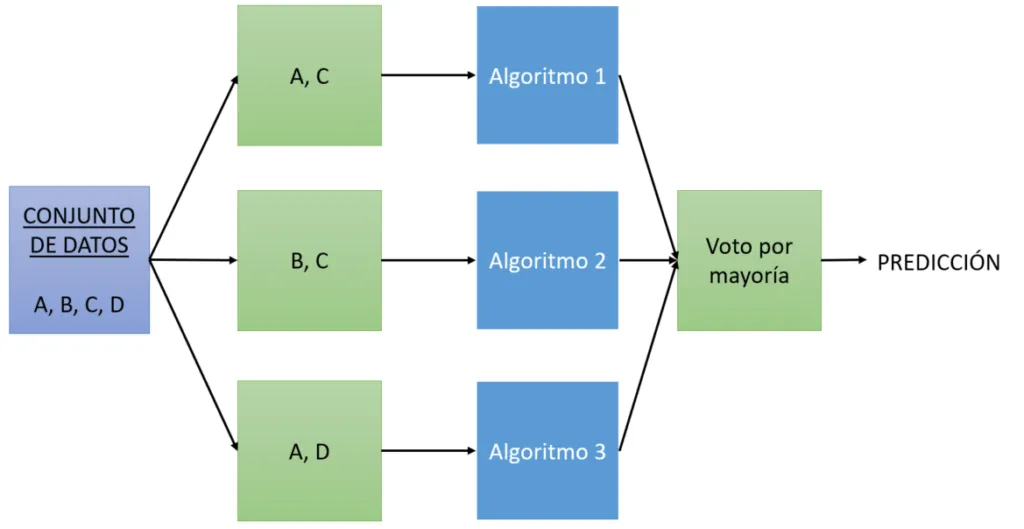

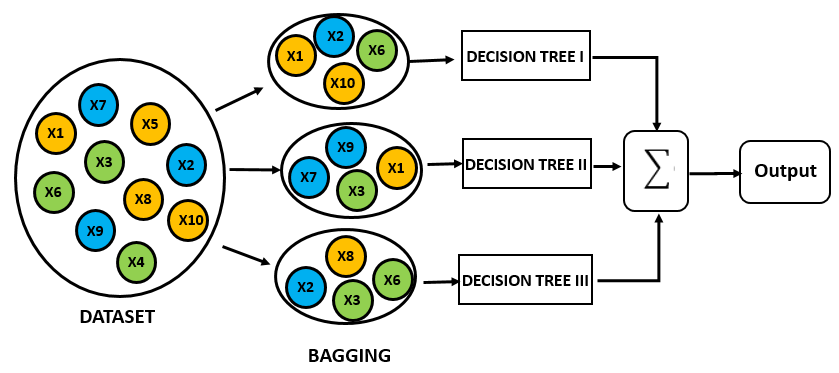

# 2.2 Boosting

### Boosting es un proceso secuencial, donde cada modelo subsiguiente intenta corregir los errores del modelo anterior. Los modelos sucesivos dependen del modelo previo.

**En esta técnica, los aprendices se entrenan secuencialmente con los primeros aprendices ajustando modelos simples a los datos y luego analizando los datos para detectar errores. En otras palabras, ajustamos árboles consecutivos (muestra aleatoria) y, en cada paso, el objetivo es resolver el error neto del árbol anterior.**

Cuando una entrada es mal clasificada por una hipótesis, su peso se incrementa para que la siguiente hipótesis sea más probable de clasificarla correctamente. Al combinar todo el conjunto al final, se convierten los aprendices débiles en un modelo de mejor rendimiento.

Boosting es otra técnica de ensemble para crear una colección de modelos.

¨**En esta técnica, los modelos se entrenan secuencialmente con los primeros modelos ajustando modelos simples a los datos y luego analizando los datos para detectar errores.**

En otras palabras, con boosting, ajustamos árboles consecutivos y en cada paso.

Boosting se puede representar con el siguiente diagrama:

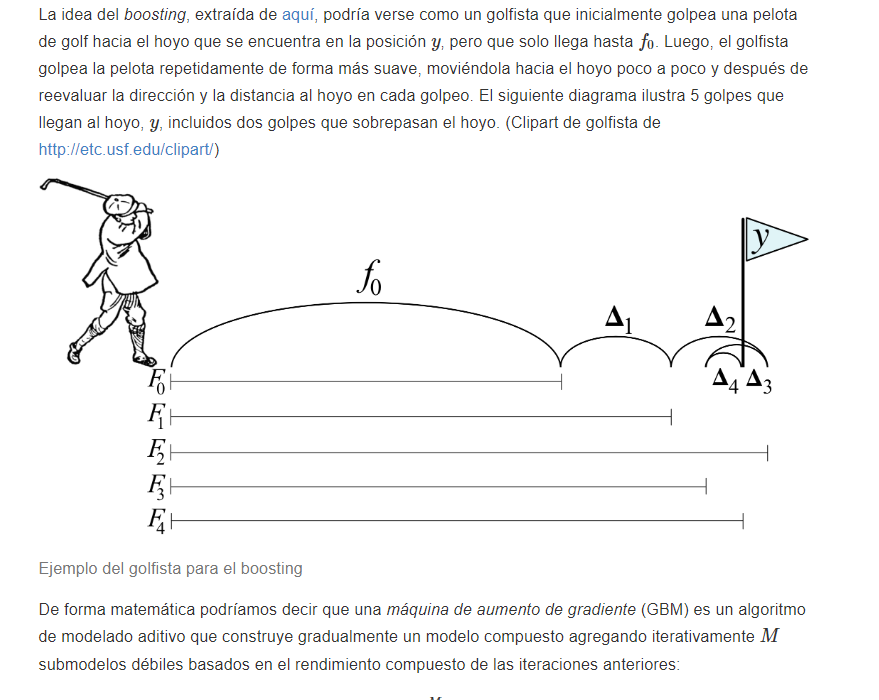

* Regularización: XGBoost ofrece hiperparámetros de regularización adicionales, que discutiremos a continuación, que añaden protección adicional contra el sobreajuste.


* Detención anticipada: similar a h2o, XGBoost implementa la detención anticipada para que podamos detener la evaluación del modelo cuando los árboles adicionales no ofrecen ninguna mejora.


* Procesamiento en paralelo: dado que el aumento de gradiente es de naturaleza secuencial, es extremadamente difícil de paralelizar. XGBoost ha implementado procedimientos para admitir la compatibilidad de GPU y Spark, lo que le permite ajustar el aumento de gradiente utilizando potentes ordenadores/sistemas de procesamiento distribuido.


* Funciones de pérdida: XGBoost permite a los usuarios definir y optimizar modelos de aumento de gradiente utilizando criterios de evaluación y objetivos personalizados.


* Continuar con el modelo existente: un usuario puede entrenar un modelo XGBoost, guardar los resultados y luego regresar a ese modelo y continuar construyendo sobre los resultados. Ya sea porque se desee revisar los resultados intermedios o haya creado configuraciones de hiperparámetros adicionales para evaluar. XGBoost permite continuar entrenando un modelo sin comenzar desde cero.
Permite tener diferentes “predictores base” : la mayoría de las implementaciones de GBM se crean con árboles de decisión, pero XGBoost también permite el uso de modelos lineales generalizados.


* Múltiples lenguajes: XGBoost ofrece implementaciones en R, Python, Julia, Scala, Java y C ++.

# CLASIFICACIÓN CON XGBOOST:

In [103]:
import os
print(os.getcwd())

d:\EAN_Curso_Machine_Learning_1\Machine_Learning_1_EAN\Codigo\Semana_3


In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities


path = '../../Datos/'
filename = 'Wholesale customers data.csv'

df = pd.read_csv(f'{path}{filename}')

In [105]:
df.info() ### Tamaño del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [106]:
df.head() ### Vista previa del dataset

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [107]:
df.describe() ### Estadística general del dataset

Channel      Region          Fresh          Milk       Grocery        Frozen  Detergents_Paper    Delicassen
count  440.000000  440.000000     440.000000    440.000000    440.000000    440.000000        440.000000    440.000000
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   3071.931818       2881.493182   1524.870455
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   4854.673333       4767.854448   2820.105937
min      1.000000    1.000000       3.000000     55.000000      3.000000     25.000000          3.000000      3.000000
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000    742.250000        256.750000    408.250000
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   1526.000000        816.500000    965.500000
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   3554.250000       3922.000000   1820.250000
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000  60869.000000      40827.000000  47943.000000

In [108]:
df.isnull().sum()  ### Este comando permite hacer un recuento de valores nulos al dataset

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [109]:
X = df.drop('Channel', axis=1)  ###DATASET PARA PREDECIR

y = df['Channel'] ### VARIABLE OBJETIVO

In [110]:
X.head() # Vista previa del dataset para entrenar el modelo

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0       3  12669  9656     7561     214              2674        1338
1       3   7057  9810     9568    1762              3293        1776
2       3   6353  8808     7684    2405              3516        7844
3       3  13265  1196     4221    6404               507        1788
4       3  22615  5410     7198    3915              1777        5185

In [111]:
### PREPROCESAMIENTO DE DATOS.

y.head() # vERIFICAMOS VARIABLE OBJETIVO

y[y == 2] = 0

y[y == 1] = 1

# Transformamos a binario, lo que sea 2 se vuelve 0 y lo que sea 1 se queda como 1

In [112]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)


# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [113]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }


# instantiate the classifier
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [114]:
# we can view the parameters of the xgb trained model as follows -

print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


In [115]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [116]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8788


# Validación Cruzada k-fold utilizando XGBoost

## Tabla de Contenidos

Para construir modelos más robustos con XGBoost, siempre debemos realizar validación cruzada k-fold.

De esta manera, nos aseguramos de que el conjunto de datos de entrenamiento original se use tanto para entrenamiento como para validación.

Además, cada entrada se utiliza para validación solo una vez.

XGBoost soporta la validación cruzada k-fold utilizando el método `cv()`.

En este método, especificaremos varios parámetros que son los siguientes:

- **nfolds**: Este parámetro especifica el número de conjuntos de validación cruzada que queremos construir.
- **num_boost_round**: Denota el número de árboles que construimos.
- **metrics**: Es la métrica de evaluación de rendimiento a considerar durante la validación cruzada.
- **as_pandas**: Se utiliza para devolver los resultados en un DataFrame de pandas.
- **early_stopping_rounds**: Este parámetro detiene el entrenamiento del modelo temprano si la métrica de validación no mejora durante un número dado de rondas.
- **seed**: Este parámetro se utiliza para la reproducibilidad de los resultados.

Podemos usar estos parámetros para construir un modelo de validación cruzada k-fold llamando al método `cv()` de XGBoost.


In [117]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

# Importancia de Características con XGBoost

## Tabla de Contenidos

XGBoost proporciona una forma de examinar la importancia de cada característica en el conjunto de datos original dentro del modelo.

Esto implica contar cuántas veces cada característica se divide en todos los árboles de boosting en el modelo.

Luego visualizamos el resultado como un gráfico de barras, con las características ordenadas según la cantidad de veces que aparecen.

XGBoost tiene una función `plot_importance()` que nos ayuda a lograr esta tarea.

Luego, podemos visualizar las características que han recibido la puntuación de importancia más alta entre todas las características.

Así, XGBoost nos proporciona una manera de realizar la selección de características.

Procederemos de la siguiente manera:


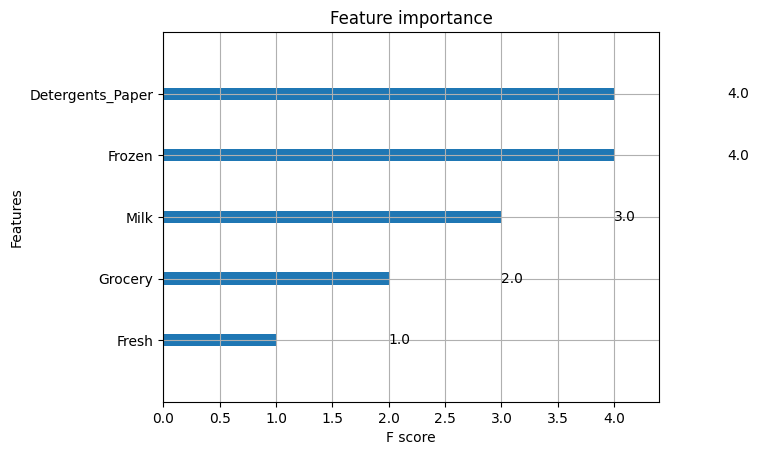

<Figure size 1600x1200 with 0 Axes>

In [118]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

### SEGUNDO EJERCICIO

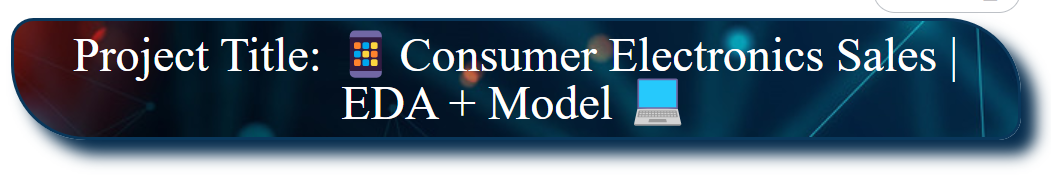

- **ProductID**: Identificador único para cada producto.
- **ProductCategory**: Categoría del producto de electrónica de consumo (por ejemplo, Smartphones, Laptops).
- **ProductBrand**: Marca del producto (por ejemplo, Apple, Samsung).
- **ProductPrice**: Precio del producto ($).
- **CustomerAge**: Edad del cliente.
- **CustomerGender**: Género del cliente (0 - Masculino, 1 - Femenino).
- **PurchaseFrequency**: Número promedio de compras por año.
- **CustomerSatisfaction**: Calificación de satisfacción del cliente (1 - 5).
- **PurchaseIntent (Variable Objetivo)**: Intención de compra basada en la edad del cliente, género y satisfacción.


In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities



path = '../../Datos/'

filename = 'consumer_electronics_sales_data.csv'


df = pd.read_csv(f'{path}{filename}')


In [120]:
# importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# full display of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [121]:
df.head(10) # OBSERVAMOS EL DATASET con head 10 para ver las 10 primeras filas

ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent
0       5874     Smartphones  Other Brands    312.949668           18               0                  2                     1               0
1       5875   Smart Watches       Samsung    980.389404           35               1                  7                     2               1
2       5876         Tablets       Samsung   2606.718293           63               0                  1                     5               1
3       5877     Smartphones       Samsung    870.395450           63               1                 10                     3               1
4       5878         Tablets          Sony   1798.955875           57               0                 17                     3               0
5       5879     Smartphones       Samsung    373.148325           37               1                  8                     1               1
6       5880     Smartphones       Samsung   2330.036775           26               1                  5                     5               1
7       5881     Smartphones            HP    780.101494           35               0                 12                     5               1
8       5882         Laptops  Other Brands   2264.561583           19               1                  3                     4               1
9       5883         Laptops            HP   1001.624006           66               1                  8                     4               1

In [122]:
print(f"The dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.") #usamos el método shape para ver la forma del dataset, el inice 0 muestra filas y el 1 las columnas

The dataset tiene 9000 filas y 9 columnas.


In [123]:
df.describe() # Describe nos da un análisis descriptivo de variables numéricas

ProductID  ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent
count   9000.000000   9000.000000  9000.000000     9000.000000        9000.000000           9000.000000     9000.000000
mean   10373.500000   1527.429195    43.347000        0.508889          10.054667              2.996000        0.566444
std     2598.220545    829.900898    15.055084        0.499949           5.461328              1.405301        0.495593
min     5874.000000    100.376358    18.000000        0.000000           1.000000              1.000000        0.000000
25%     8123.750000    809.165014    30.000000        0.000000           5.000000              2.000000        0.000000
50%    10373.500000   1513.024577    43.000000        1.000000          10.000000              3.000000        1.000000
75%    12623.250000   2244.415520    56.000000        1.000000          15.000000              4.000000        1.000000
max    14873.000000   2999.852253    69.000000        1.000000          19.000000              5.000000        1.000000

In [124]:
df.duplicated().sum()  #Duplicated filtrafilas duplicadas y sum las suma, con esta combinación obtenemos el recuento de filas duplicadas

0

In [125]:
df.info() #Nos pemite ver variables y tipo de variables así como recuento de valores No nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [126]:
plt = px.histogram(df, x = 'ProductCategory', title="Distribucióncategoría de productos", color_discrete_sequence=px.colors.sequential.Cividis)
plt.show()

In [127]:
plt = px.histogram(df, x = 'ProductBrand', title="Distribución por marcas",  color_discrete_sequence=px.colors.sequential.Aggrnyl)
plt.show()  # Hacemos un gráfico tipo barras o histograma para ver las marcas más simportantes

In [128]:
plt = px.histogram(df, x = 'ProductPrice', title="Product Price Distribution", color_discrete_sequence=px.colors.sequential.Agsunset)
plt.show() # Distribución por PRECIOS

In [129]:
plt = px.histogram(df, x = 'CustomerAge', title="Distribución por edades", color_discrete_sequence=px.colors.sequential.Bluered)
plt.show() # Distribución por edades

In [130]:
plt = px.pie(df, names = 'CustomerGender', title="Genero de clientes Distribution", color_discrete_sequence=px.colors.sequential.Turbo_r)
plt.show() # Distribución por género

In [131]:
plt = px.histogram(df, x = 'PurchaseFrequency', title="Purchase Frequency Distribution", color_discrete_sequence=px.colors.sequential.haline)
plt.show() #Frecuencia de compras

### EN LA VARIABLE PURCHASEINTENT QUE SIGNIFICA INTENTO DE COMPRA PODEMOS VER SI EL CLIENTE COMPRÓ UN PRODUCTO O NO LO COMPRÓ

In [132]:
plt = px.pie(df, names = 'PurchaseIntent', title="distribución intento de compra", color_discrete_sequence=px.colors.sequential.Mint)
plt.show()

### la siguiente celda de código recorre todas las columnas y para cada columna mira la relación con el intento de compra

In [133]:
for col in df.columns:
    plt = px.histogram(df, x=col, color='PurchaseIntent', title=f"{col} Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
    plt.show()

In [134]:
plt = px.histogram(df, x = 'ProductCategory', color='ProductBrand', title="Product Category and Brand Distribution", color_discrete_sequence=px.colors.sequential.Blackbody_r)
plt.show() #Relación de producto con la marca

### relación de producto con el precio

In [135]:
plt = px.histogram(df, x = 'ProductPrice', color='ProductBrand', title="Product Category and Price Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

### Codificamos la data categórica a data numérica NO binaria

In [136]:
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

In [137]:
df.head(10)

ProductID  ProductCategory  ProductBrand  ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent
0       5874                3             2    312.949668           18               0                  2                     1               0
1       5875                2             3    980.389404           35               1                  7                     2               1
2       5876                4             3   2606.718293           63               0                  1                     5               1
3       5877                3             3    870.395450           63               1                 10                     3               1
4       5878                4             4   1798.955875           57               0                 17                     3               0
5       5879                3             3    373.148325           37               1                  8                     1               1
6       5880                3             3   2330.036775           26               1                  5                     5               1
7       5881                3             1    780.101494           35               0                 12                     5               1
8       5882                1             2   2264.561583           19               1                  3                     4               1
9       5883                1             1   1001.624006           66               1                  8                     4               1

### Evaluamos la correación de las variables en el dataset

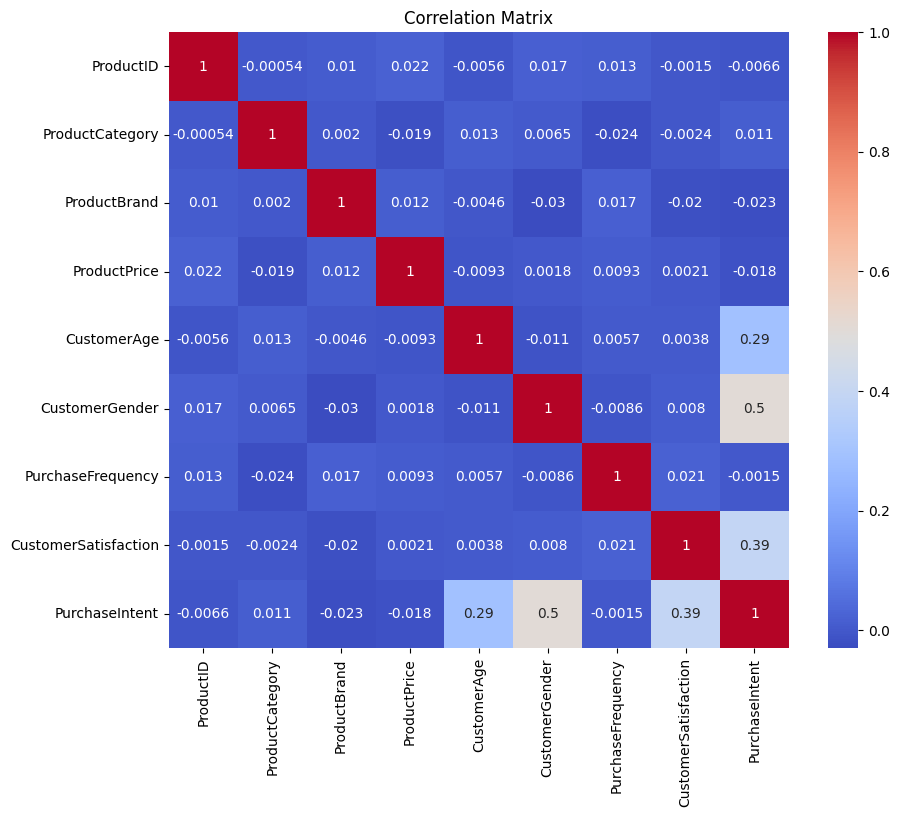

In [138]:
import matplotlib.pyplot as plt
# correlation matrix and heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [139]:
X = df.drop(['ProductID', 'PurchaseIntent'], axis=1) # Data de entrenamiento (variables independientes, excluyendo variable objetivo)
y = df['PurchaseIntent'] #Variable objetivo o variable a predecir

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Spliteamos o dividimos el dataset, 20% para test y 80% para entrenamiento

### La siguiente celda realiza un escalamiento estándar a los datos, es decir dividir entre la desviación estándar y restar a cada variable la media, así la desviación estándar se vuelve uno y la media 0

In [141]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### La siguiente celda entrena diferentes modelos incluyendo regresión, Random forest, arbol de decisión simple, catboost que es epecial para variables categóricas y el XGboost clasificador.

In [142]:
# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost Classifier': CatBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
Learning rate set to 0.023934
0:	learn: 0.6610107	total: 6.12ms	remaining: 6.11s
1:	learn: 0.6305307	total: 12.7ms	remaining: 6.32s
2:	learn: 0.6039513	total: 18.2ms	remaining: 6.05s
3:	learn: 0.5774311	total: 23.7ms	remaining: 5.9s
4:	learn: 0.5526912	total: 26ms	remaining: 5.18s
5:	learn: 0.5305021	total: 30.4ms	remaining: 5.04s
6:	learn: 0.5081070	total: 34.1ms	remaining: 4.84s
7:	learn: 0.4878828	total: 36.8ms	remaining: 4.56s
8:	learn: 0.4689585	total: 39.8ms	remaining: 4.39s
9:	learn: 0.4511295	total: 43ms	remaining: 4.25s
10:	learn: 0.4345934	total: 45ms	remaining: 4.04s
11:	learn: 0.4191657	total: 46.6ms	remaining: 3.83s
12:	learn: 0.4055207	total: 48.2ms	remaining: 3.66s
13:	learn: 0.3920087	total: 50.3ms	remaining: 3.54s
14:	learn: 0.3791286	total: 52.4ms	remaining: 3.44s
15:	learn: 0.3672279	total: 53.9ms	remaining: 3.32s
16:	learn: 0.3560543	total: 55.9ms	remaining: 3.23s
17:

### los resultados indican que el mejor R2 score lo obtuvo el random forest, seguido del Xgboost y el catboost que empataron

**Obtenemos el feature importances de cada modelo**

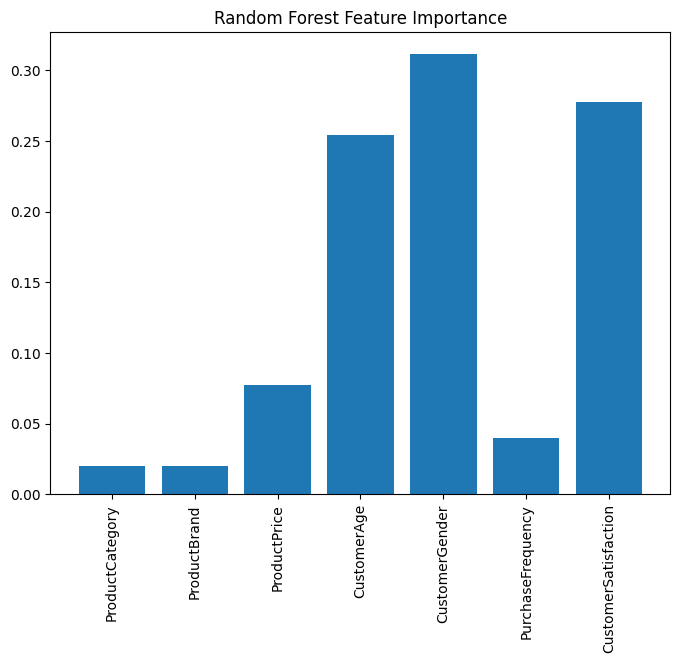

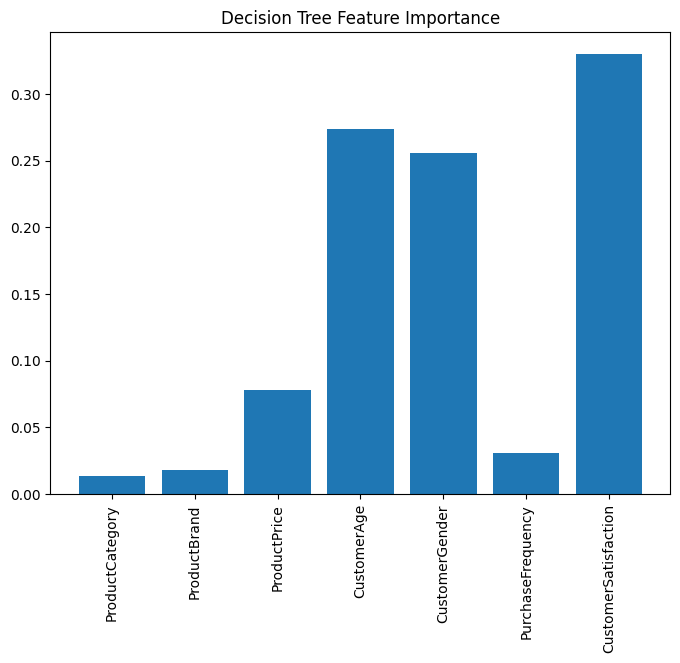

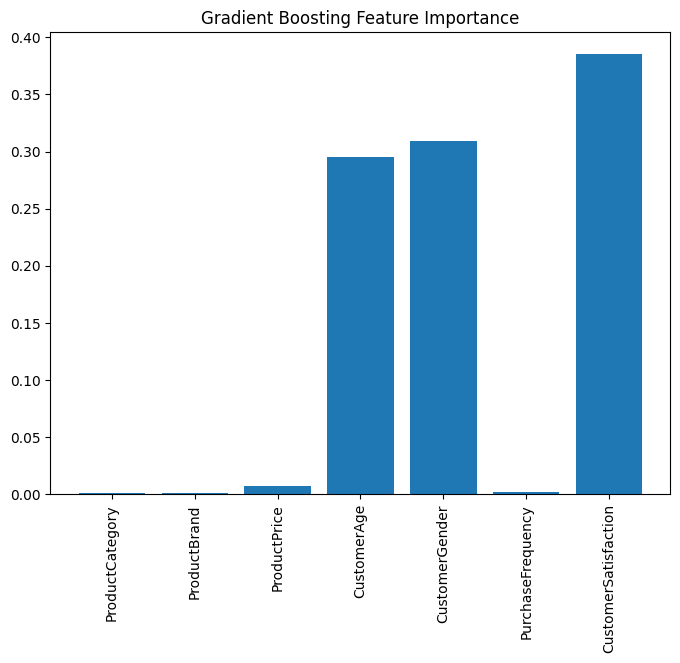

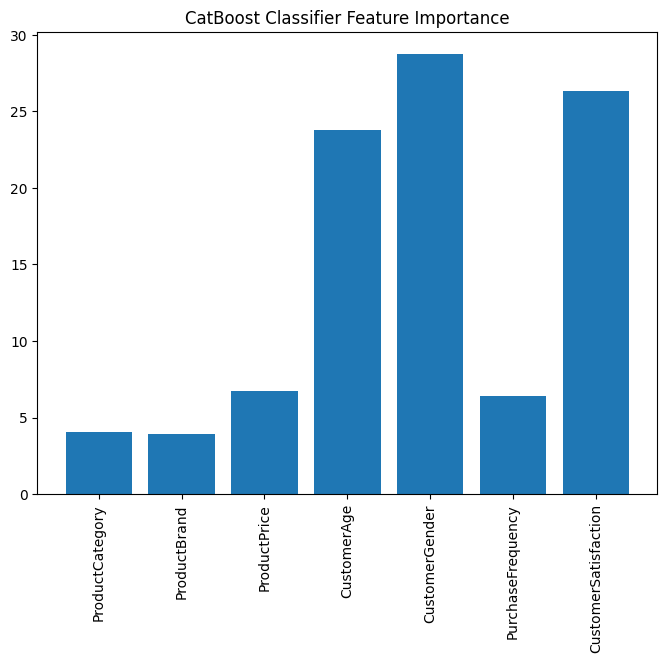

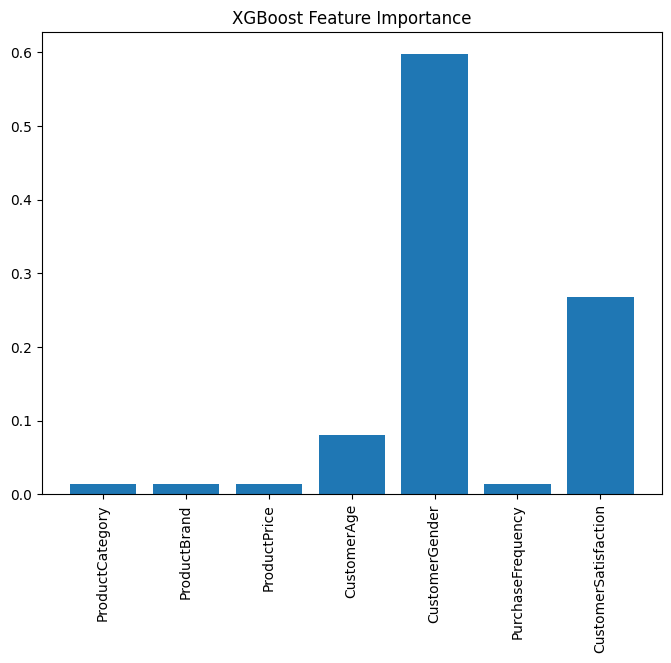

In [143]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(feature_importances)), feature_importances)
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f"{name} Feature Importance")
        plt.show()

### REGRESION CON XGBOOST:

 Estrategia de tuning
La estrategia de ajuste general para explorar los hiperparámetros de xgboost se basa en las estrategias de ajuste básicas y estocásticas de GBM:

Aumentar el número de árboles y ajustar la velocidad de aprendizaje con una parada temprana
Ajustar hiperparámetros específicos del árbol
Explorar los atributos estocásticos de GBM
Si se produce un sobreajuste sustancial (por ejemplo, grandes diferencias entre la muestra “train” y el error de CV), explorar los hiperparámetros de regularización
Si encontramos valores de hiperparámetros que son sustancialmente diferentes de la configuración predeterminada, asegurarnos de volver a ajustar la tasa de aprendizaje.
Obtener el modelo “óptimo” final

**Vamos a predecir el precio de diamantes usando XGBregressor**

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

https://www.kaggle.com/datasets/braitonnepomucen/diamondscsv [link a dataset de diamantes]

In [145]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities



path = '../../Datos/'

filename = 'diamonds.csv'


df = pd.read_csv(f'{path}{filename}')


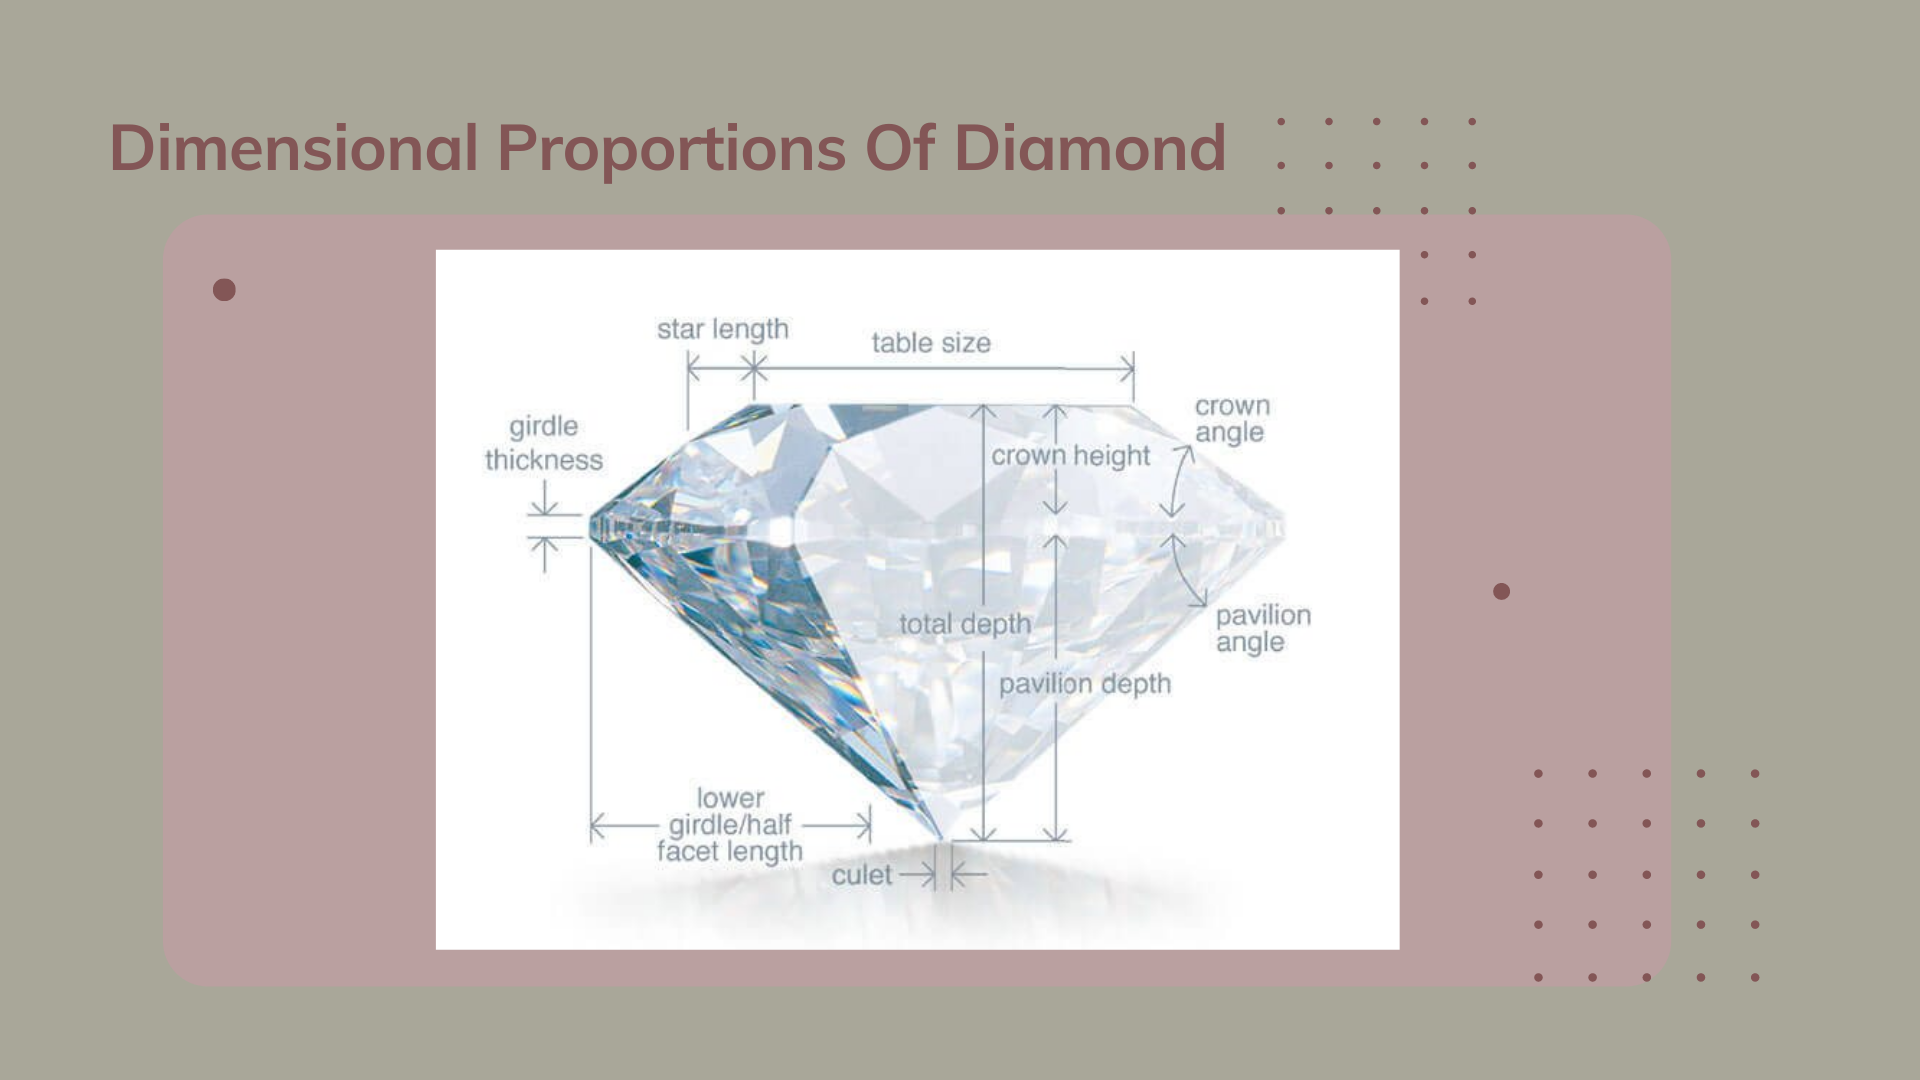

# Cargando Datos

Este conjunto de datos clásico contiene los precios y otros atributos de casi 54,000 diamantes. Hay 10 atributos incluidos en el conjunto de datos, incluyendo la variable objetivo, es decir, el precio.

## Descripción de las Características:

- **price**: Precio en dólares estadounidenses ($326--$18,823). Esta es la columna objetivo que contiene etiquetas para las características.

## Los 4 Cs de los Diamantes:

- **carat (0.2--5.01)**: El quilate es el peso físico del diamante medido en quilates métricos. Un quilate equivale a 1/5 de gramo y se subdivide en 100 puntos. El peso en quilates es la calificación más objetiva de los 4Cs.

- **cut (Fair, Good, Very Good, Premium, Ideal)**: Al determinar la calidad del corte, el evaluador del diamante considera la habilidad del cortador en la talla del diamante. Cuanto más preciso sea el corte del diamante, más cautivador será para la vista.

- **color (de J (peor) a D (mejor))**: El color de los diamantes de calidad gema se presenta en muchos tonos. En el rango de incoloro a amarillo claro o marrón claro. Los diamantes incoloros son los más raros. Otros colores naturales (azul, rojo, rosa, por ejemplo) se conocen como "fancy" y su clasificación de color es diferente a la de los diamantes incoloros blancos.

- **clarity (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))**: Los diamantes pueden tener características internas conocidas como inclusiones o características externas conocidas como manchas. Los diamantes sin inclusiones o manchas son raros; sin embargo, la mayoría de las características solo se pueden ver con magnificación.

## Dimensiones:

- **x**: Longitud en mm (0--10.74)
- **y**: Ancho en mm (0--58.9)
- **z**: Profundidad en mm (0--31.8)


In [146]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y     z
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

- **depth**: Porcentaje de profundidad total = z / media(x, y) = 2 * z / (x + y) (43--79). La profundidad del diamante es su altura (en milímetros), medida desde la culet (punta inferior) hasta la tabla (superficie plana superior).

- **table**: Ancho de la parte superior del diamante en relación con el punto más ancho (43--95).

La "tabla" de un diamante se refiere a la faceta plana del diamante que se ve cuando la piedra está hacia arriba. El propósito principal de la tabla de un diamante es refractar los rayos de luz entrantes y permitir que los rayos de luz reflejados desde el interior del diamante lleguen al ojo del observador. Un diamante con un corte de tabla ideal dará al diamante un fuego y brillo impresionantes.


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [148]:
#La primera columna es sólo un indice, la eliminamos
data = df.drop(["Unnamed: 0"], axis=1)
data.describe()

carat         depth         table         price             x             y             z
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722      5.731157      5.734526      3.538734
std        0.474011      1.432621      2.234491   3989.439738      1.121761      1.142135      0.705699
min        0.200000     43.000000     43.000000    326.000000      0.000000      0.000000      0.000000
25%        0.400000     61.000000     56.000000    950.000000      4.710000      4.720000      2.910000
50%        0.700000     61.800000     57.000000   2401.000000      5.700000      5.710000      3.530000
75%        1.040000     62.500000     59.000000   5324.250000      6.540000      6.540000      4.040000
max        5.010000     79.000000     95.000000  18823.000000     10.740000     58.900000     31.800000

In [149]:
#Eliminamos los diamantes que tengan valor de 0 en algunas de sus dimensiones
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [150]:
# dtypes dice que tipo de dato es, normalmente las columnas que dicen OBJECT, son variables categóricas, filtramos para ver cuales variables son categóricas
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


### Procedemos a codificar las variables categóricas

In [151]:
# Creamos una copia del dataset original para evitar modificar los datos originales, con la función df.copy()
label_data = data.copy()

# Aplicamos el codificador a cada columna de object_cols, recordemos que object cols es la lista de variables categóricas que acabamos de obtener
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()


carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [152]:
data.describe() #ahora todas son variables numéricas

carat         depth         table         price             x             y             z
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000
mean       0.797698     61.749514     57.456834   3930.993231      5.731627      5.734887      3.540046
std        0.473795      1.432331      2.234064   3987.280446      1.119423      1.140126      0.702530
min        0.200000     43.000000     43.000000    326.000000      3.730000      3.680000      1.070000
25%        0.400000     61.000000     56.000000    949.000000      4.710000      4.720000      2.910000
50%        0.700000     61.800000     57.000000   2401.000000      5.700000      5.710000      3.530000
75%        1.040000     62.500000     59.000000   5323.250000      6.540000      6.540000      4.040000
max        5.010000     79.000000     95.000000  18823.000000     10.740000     58.900000     31.800000

### Evaluamos la correlación con un mapa de color, recordemos que df.corr() es un método de Pandas para evaluar correlación y por defecto evalua la correlación de Pearson que es una manera de evaluar la correlación LINEAL entre variables, para evaluar correlación no lineal tendríamos que usar otras métricas como Kendal Tau y  Spearman

<Axes: >

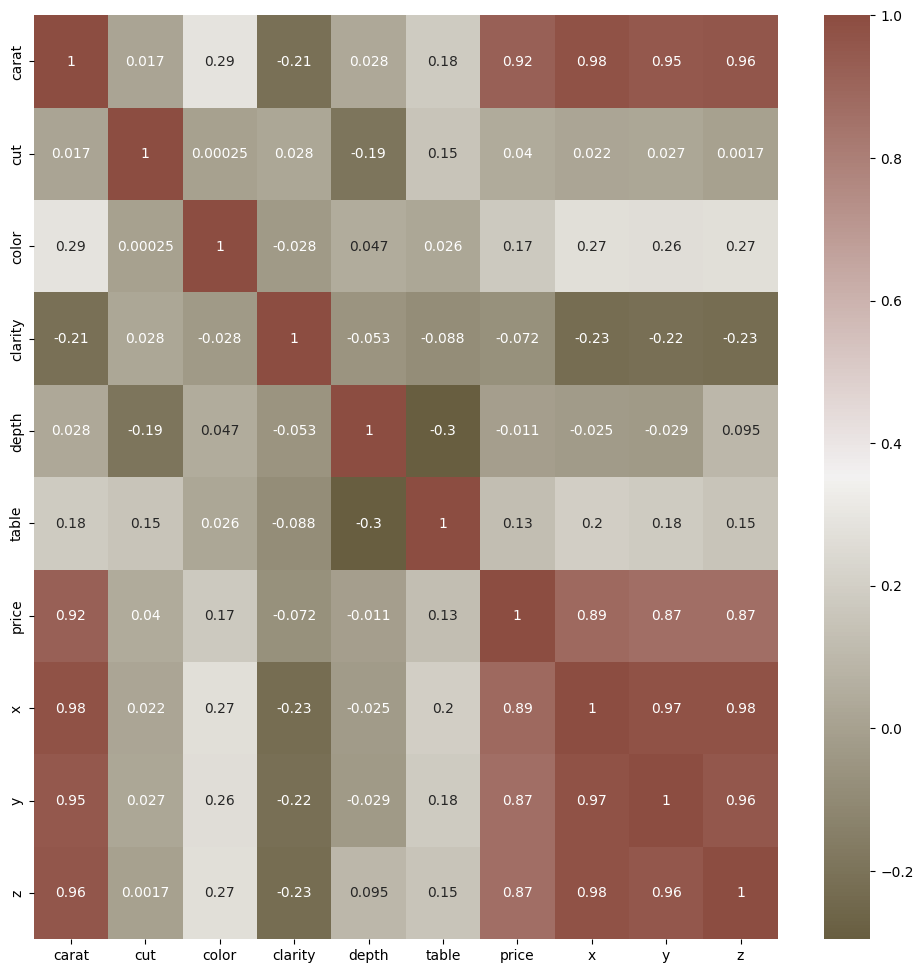

In [153]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

### De entrada se observa que las dimensiones X,Y y Z están altamente correlacionadas con Carat y con el precio, así como entre ellas mismas. Por ejemplo X y Y tienen una correlación de 0.98, y Z tiene una correlación de Pearson de 0.87 con el precio

# Construcción del Modelo

## Pasos involucrados en la Construcción del Modelo

1. Configuración de características y variable objetivo.
2. Construir una tubería (pipeline) de escalado estándar y un modelo para cinco diferentes regresores.
3. Ajustar todos los modelos con los datos de entrenamiento.
4. Obtener la media de la validación cruzada en el conjunto de entrenamiento para todos los modelos en términos de error cuadrático medio negativo.
5. Elegir el modelo con la mejor puntuación de validación cruzada.
6. Ajustar el mejor modelo en el conjunto de entrenamiento y obtener los resultados.
7. Codificación de variables categóricas.


In [154]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)


### Aquí vamos a usar Pipelines que son como series de pasos, es decir, rutas o flujogramas, cada uno de estos pipelines va a primero escalar los datos y luego aplicar un algoritmo diferente de machine learning.

In [155]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])  ### Aquí vemos el random Forest.


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())]) ### Aquí vemos el XGboost

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [156]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1362.991893 
DecisionTree: -754.914061 
RandomForest: -551.650474 
KNeighbors: -821.091507 
XGBRegressor: -549.985803 


**El código realiza validación cruzada en varios modelos de regresión usando el error cuadrático medio (RMSE) negativo como métrica de evaluación.**

## Explicación del Código
Inicialización de cv_results_rms: Se crea una lista para almacenar los resultados de la validación cruzada de cada modelo.

### Bucle sobre los Modelos: El for recorre cada modelo en la lista pipelines.

* Validación Cruzada (cross_val_score):
Se usa cross_val_score para realizar validación cruzada con los datos de entrenamiento (X_train y y_train).
scoring="neg_root_mean_squared_error" indica que se usará el RMSE negativo como métrica.
cv=10 significa validación cruzada con 10 particiones.
Agregar Resultados: Los resultados de la validación cruzada se añaden a la lista cv_results_rms.

* Impresión del Resultado Promedio: Se imprime el promedio de los resultados de validación cruzada para cada modelo.

* ¿Por qué usar el RMSE "negativo"?
Convención de Scikit-Learn: Scikit-learn usa métricas que maximizan los valores para ser consistentes en todos los modelos. Como RMSE es mejor cuando es menor, se usa su valor negativo (neg_root_mean_squared_error) para convertirlo en una métrica que se maximice.

* Métrica "negativa": Usando el negativo del RMSE, los resultados se pueden comparar y seleccionar en función de los valores "mayores", siguiendo la convención de métricas que se maximizan.



**Estos resultados representan las puntuaciones de validación cruzada del error cuadrático medio negativo (RMSE negativo) para diferentes modelos de regresión. Al ser "negativo", un valor más cercano a cero indica un mejor desempeño del modelo**. Vamos a interpretarlos:

* Interpretación de los Resultados:
LinearRegression: -0.353310
Este modelo tiene el RMSE negativo más bajo, lo que indica que es el que peor predice de todos los modelos comparados. Un valor más negativo implica mayor error.

* DecisionTree: -0.326087
El árbol de decisión también tiene un RMSE negativo relativamente alto, lo que sugiere que su rendimiento es pobre, aunque ligeramente mejor que la regresión lineal.

* RandomForest: -0.224795
Este modelo tiene el RMSE negativo más cercano a cero, lo que indica que tiene el mejor rendimiento en términos de predicción entre todos los modelos evaluados.

* KNeighbors: -0.279839
El modelo de vecinos más cercanos tiene un RMSE negativo moderado. Su desempeño es mejor que LinearRegression y DecisionTree, pero peor que RandomForest y XGBRegressor.

* XGBRegressor: -0.232186
Este modelo también tiene un buen rendimiento con un RMSE negativo bajo, cercano al de RandomForest, pero ligeramente peor.

**Conclusión:
El modelo RandomForest y XGboost son los que presentan el mejor rendimiento en términos de error de predicción, ya que tiene el RMSE negativo más alto (más cercano a cero). Por lo tanto, podrías elegir RandomForest o XGboost como los mejores modelos para predecir en este caso.**

### VAMOS A PREDECIR

In [157]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

### pred va a ser una variable que continene un vector con las predicciones del xgb con base a X_test (dataset con las variables no dependientes que contiene el 20% de los datos que reservamos para validar o test, ya que el 80% se usaron para ENTRENAR)

In [158]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9807432889938354
Adjusted R^2: 0.9807304225944995
MAE: 275.9039350515303
MSE: 306372.1540923359
RMSE: 553.5089467139044


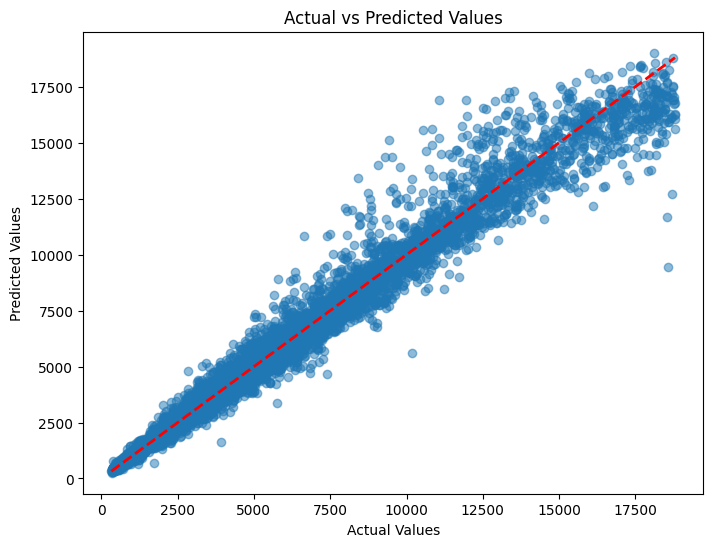

In [159]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


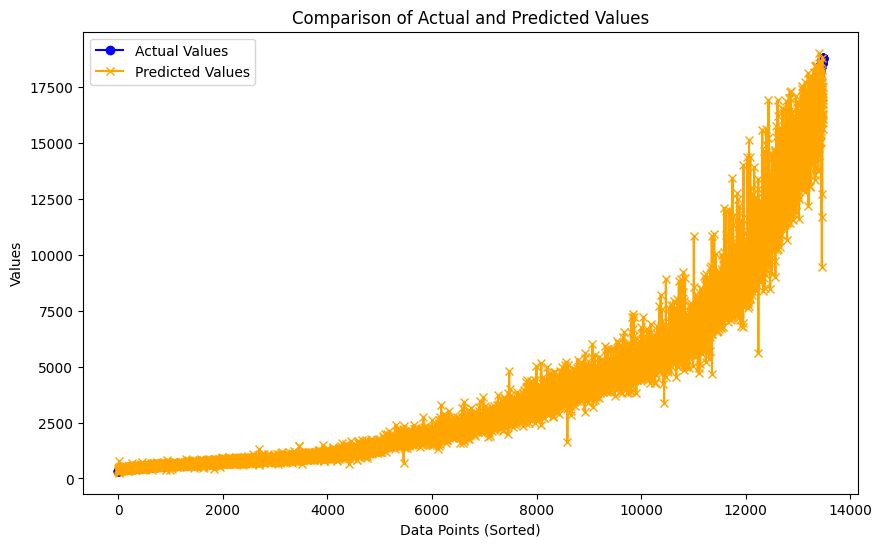

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting the values for a better visual comparison
y_test_sorted, pred_sorted = zip(*sorted(zip(y_test, pred)))

# Line plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Values', color='blue', marker='o')
plt.plot(pred_sorted, label='Predicted Values', color='orange', marker='x')
plt.xlabel('Data Points (Sorted)')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()
